In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('airline_sentiment_analysis.csv')

In [6]:
df.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df.drop(["a"], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11541 entries, 0 to 11540
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  11541 non-null  object
 1   text               11541 non-null  object
dtypes: object(2)
memory usage: 180.5+ KB


In [8]:
df.head()

,airline_sentiment,text
0,positive,@VirginAmerica plus you've added commercials t...
1,negative,@VirginAmerica it's really aggressive to blast...
2,negative,@VirginAmerica and it's a really big bad thing...
3,negative,@VirginAmerica seriously would pay $30 a fligh...
4,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [12]:
df.loc[1]['text']

'@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse'

In [17]:
is_positive = df['airline_sentiment'].str.contains("positive")
is_negative = df['airline_sentiment'].str.contains("negative")
is_neutral = df['airline_sentiment'].str.contains("neutral")


In [18]:
is_positive.head()

0     True
1    False
2    False
3    False
4     True
Name: airline_sentiment, dtype: bool

In [20]:
positive_tweets = df[is_positive]
positive_tweets.shape


(2363, 2)

In [21]:
negative_tweets = df[is_negative]
negative_tweets.shape


(9178, 2)

In [22]:
neutral_tweets = df[is_neutral]
neutral_tweets.shape


(0, 2)

In [30]:
virgin = df['text'].str.contains("@Virgin")

In [34]:
from wordcloud import WordCloud,STOPWORDS


In [35]:
df1=df[df['airline_sentiment']=='negative']
words = ' '.join(df1['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])


In [36]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)


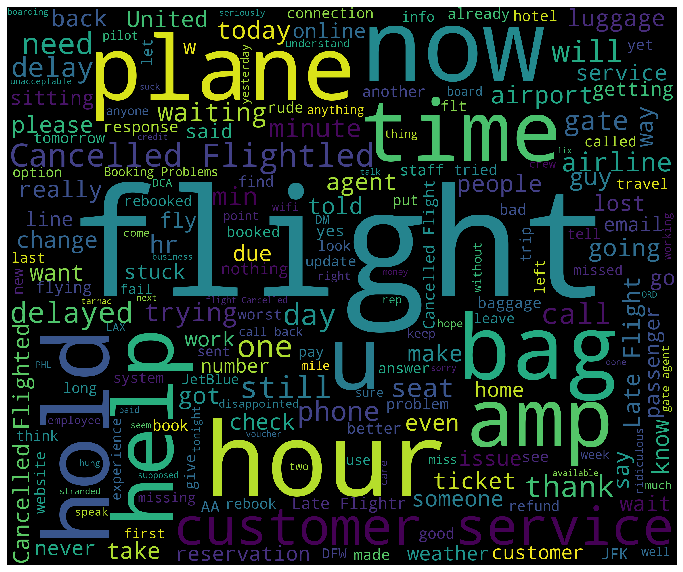

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [40]:
import re
import nltk
from nltk.corpus import stopwords


In [41]:
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 


In [42]:
def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 


In [43]:
df['sentiment']=df['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)


In [49]:

from sklearn.model_selection import train_test_split
df['clean_tweet']=df['text'].apply(lambda x: tweet_to_words(x))
df['Tweet_length']=df['text'].apply(lambda x: clean_tweet_length(x))
train,test = train_test_split(df,test_size=0.2,random_state=42)


In [50]:
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)


In [76]:
import pickle
pickle.dump(v,open('v.pkl','wb'))

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [53]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

In [54]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy)) 

Accuracy of LogisticRegressionis 0.8064097011693374
Accuracy of KNeighborsClassifieris 0.7267215244694673
Accuracy of SVCis 0.8072758770030316
Accuracy of DecisionTreeClassifieris 0.8570809874404504
Accuracy of RandomForestClassifieris 0.899090515374621
Accuracy of AdaBoostClassifieris 0.8787353832828064
Accuracy of GaussianNBis 0.6929406669553919


In [74]:
def new_review(new_review):
  new_review = new_review
  new_review = re.sub('[^a-zA-Z]', ' ', new_review)
  new_review = new_review.lower()
  new_review = new_review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  new_review = [ps.stem(word) for word in new_review if not word in  set(all_stopwords)]
  new_review = ' '.join(new_review)
  new_corpus = [new_review]
  new_X_test = v.transform(new_corpus).toarray()
  print(new_X_test.shape)
  rb=RandomForestClassifier()
  ld=rb.fit(train_features,train['sentiment'])
  new_y_pred = ld.predict(new_X_test)
  return new_y_pred

In [70]:
from nltk.stem.porter import PorterStemmer ## stemming of words
from sklearn.feature_extraction.text import CountVectorizer

#cv=CountVectorizer(max_features=1500)

In [75]:
new_review('@Virgin cancelled the flight. it is so bad')

(1, 9943)


array([0], dtype=int64)